# Large HALO

---

### General Setup
This section imports essential libraries for optimization, plotting, and time-tracking, which will be used throughout the experiment.

In [1]:
import pygmo as pg # type: ignore
import matplotlib.pyplot as plt # type: ignore
import time # for time.time()
from datetime import datetime
from scipy.stats import ks_2samp, ttest_ind, levene # type: ignore


---

### UDP and Problem
Here, we load the User Defined Problem (UDP) and initialize the problem for optimization. For this experiment, we're using the "large-halo" problem, a more complex optimization challenge.

In [2]:
from problems.golomb_hard import udp
problem = pg.problem(udp)
from problems.golomb_hard import udp as tight_udp
tight_problem = pg.problem(tight_udp)


---

### Locally Defined Imports
We import custom modules that handle specific tasks like chromosome manipulation, file handling, generating results, and population operations. These modules contain the core logic of our experiment.

In [3]:
from chromosome_operations import *
from file_handling import *
from output_helpers import *
from population_operations import *
from results_generators import *
from experiments import *


---

### Reloading Libraries (for Notebook Use)
To avoid restarting the Jupyter kernel after updating custom libraries, this block reloads the modules. This allows you to apply changes to these libraries on the fly during experimentation.

In [4]:
"""
RELOAD Libraries - Instead of restarting the kernel
Allows reloading of custom libraries after changes, without needing to restart the Jupyter kernel.
"""

import importlib

import problems.golomb_hard
importlib.reload(problems.golomb_hard)
from problems.golomb_hard import udp
from problems.golomb_hard import udp as tight_udp

import chromosome_operations
importlib.reload(chromosome_operations)
from chromosome_operations import *

import file_handling
importlib.reload(file_handling)
from file_handling import *

import output_helpers
importlib.reload(output_helpers)
from output_helpers import *

import population_operations
importlib.reload(population_operations)
from population_operations import *

import results_generators
importlib.reload(results_generators)
from results_generators import *

import experiments
importlib.reload(experiments)
from experiments import *


---

### Orbit Name Initialization
This block sets the orbit name for tracking and organizing population configurations specific to the problem being solved. In this case, we are working with the "large-halo" orbit.

In [5]:
ORBIT_NAME = "large-halo"

---

## ***Experiment : Pool Refinement Comparison***

### Purpose
This experiment compares various satellite pool refinement methods (basic, fitness-based, and fill-factor-based) to assess their effectiveness in generating high-fitness initial satellite constellations. The goal is to determine whether refined pools lead to better performance and inform future optimization efforts.

---

### Generating results
We evaluate three different satellite pools and two chromosome generation methods for each pool:
* Satellite Pools:
   1. `unrefined`: Randomly generated satellites within bounds, only retaining alive ones.
   2. `refined`: The `unrefined` pool, with mutations applied and fitness used to select better satellites.
   3. `refined-fill-factor`: Similar to `refined`, but the selection is based on minimizing fill factor instead of fitness.
* Chromosome Generation Methods:
   1. `from-pool`: Generates chromosomes from the pool without any additional filtering.
   2. `from-pool-differentiated`: A refined method that ensures diversity by selecting distant satellites within the pool.

Additionally, we compare both methods against the `from-bounds` strategy, which generates chromosomes randomly within the UDP bounds without relying on a pre-generated pool.

The objective is to determine whether pool refinement improves the initial configurations or if the unrefined pool performs just as well.

In [6]:
results, metadata = experiment_pool_refinement_generate(udp, ORBIT_NAME)

Results already exist. Loading from results/large-halo/pool_refinement_comparison/results.json



---

### Plotting
We plot the fitness distributions for each pool and method using histograms and box plots. This provides a visual comparison of how well each method performed in terms of generating high-fitness constellations.

Plot already generated from current data. Skipping plot generation.


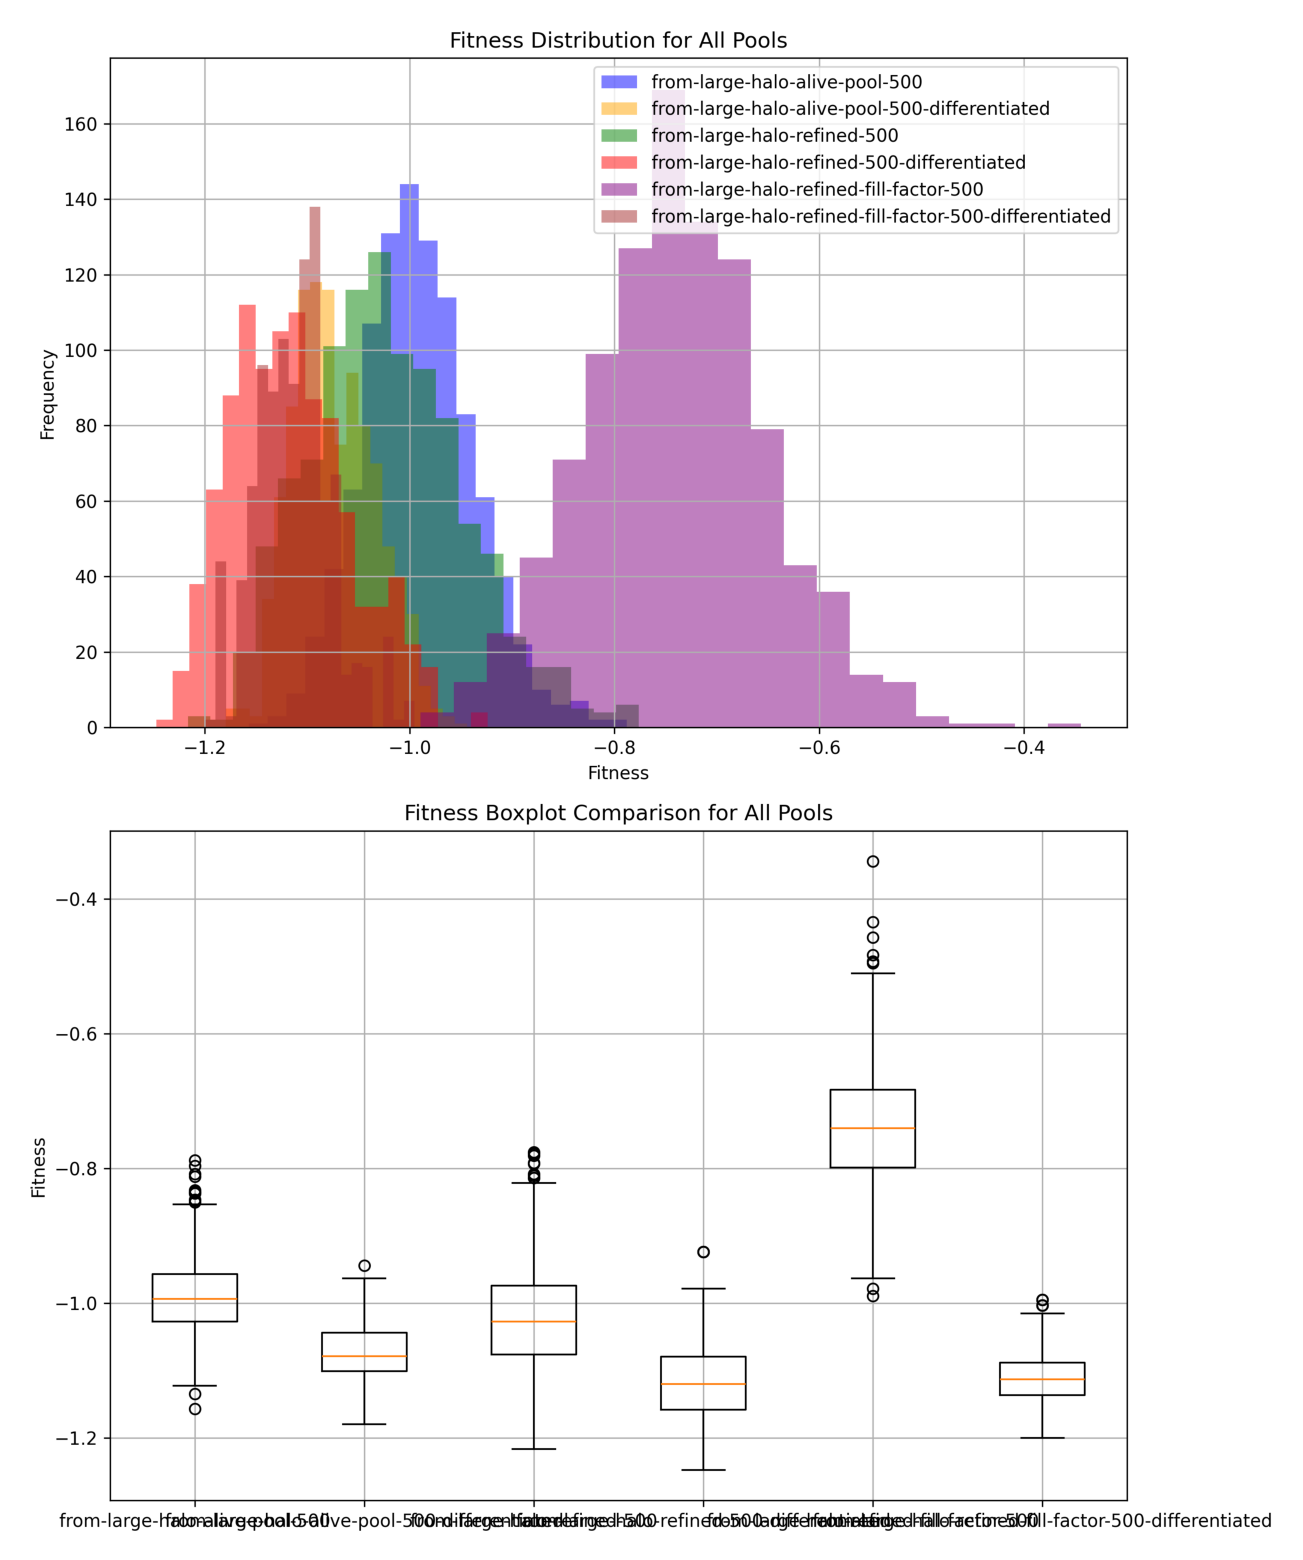

In [7]:
experiment_pool_refinement_plot(udp, ORBIT_NAME)

---

### Results

We calculate and display statistical summaries for each pool and method, including mean, median, quartiles, and standard deviation. These statistics will help quantify how much pool refinement impacts the initial fitness of constellations.

In [8]:
experiment_pool_refinement_stats(udp, ORBIT_NAME)


Fitness Statistics:
+--------------------------------------------------------+----------+------------+---------------+------------+----------+----------+-----------+
| Method Name                                            |      Min |   Q1 (25%) |   Median (Q2) |   Q3 (75%) |      Max |     Mean |   Std Dev |
+========================================================+==========+============+===============+============+==========+==========+===========+
| from-large-halo-alive-pool-500                         | -1.15705 |   -1.02736 |      -0.99405 |   -0.95717 | -0.78822 | -0.991   |   0.0541  |
+--------------------------------------------------------+----------+------------+---------------+------------+----------+----------+-----------+
| from-large-halo-alive-pool-500-differentiated          | -1.17965 |   -1.10113 |      -1.07852 |   -1.04402 | -0.94408 | -1.0731  |   0.03987 |
+--------------------------------------------------------+----------+------------+---------------+-----


---

### Observations
* The different pool refinement strategies (both fitness-based and fill-factor-based) did not lead to significant improvements in the initial population fitness when compared to the unrefined pool.
* In some cases, the from-pool-differentiated method using the unrefined pool actually outperformed the refined pools.
* Refinement methods seem to add computational overhead without yielding clear fitness benefits, suggesting that the added complexity may not be justified for this problem.

<br>

---

### Conclusion
Given these findings, we will pivot away from refining the satellite pool prior to initialization. Instead, the focus will shift toward optimizing how the unrefined pool is used to generate stronger initial populations. Specifically:

* We will experiment with advanced chromosome generation techniques that leverage the unrefined pool to maximize diversity and fitness.
* The goal moving forward will be to generate stronger initial populations and then evolve these populations to achieve higher fitness scores in less time.
* Refining the population post-initialization will be explored further, building on the best configurations obtained from the unrefined pool.

<br>

---

## ***Experiment : Distance Metric Comparison***
### Purpose
This experiment aims to compare various distance metrics (e.g., Manhattan, Euclidean) for generating chromosomes from a satellite pool using the `from-pool-differentiated` method. The goal is to determine which distance metric yields the most optimized initial chromosome configurations. The results will guide us in selecting the best metric for future experiments.

---

### Generating Results
We will use the available distance metrics from the DistanceMetric class to generate 1000 chromosomes for each metric. These chromosomes will be generated using the from-pool-differentiated method and the alive satellite pool. We will evaluate their fitness and save the results for comparison.

This first block will print out the different metrics will will be comparing

In [9]:
print_distance_metrics()

Available Distance Metrics:
+-------------------+
| Distance Metric   |
+===================+
| manhattan         |
+-------------------+
| geometric         |
+-------------------+
| velocity          |
+-------------------+
| position          |
+-------------------+
| orbital           |
+-------------------+


---

In [10]:
experiment_distance_metric_comparison_generate(udp, ORBIT_NAME)

Comparison already computed. Loading results from results/large-halo/distance_metric_comparison/results.


---

### Plotting
We will plot histograms and box plots to compare the fitness distributions across the different distance metrics. This visualization will help us identify the distance metric that consistently produces higher fitness values.

Plot already generated from current data. Skipping plot generation.


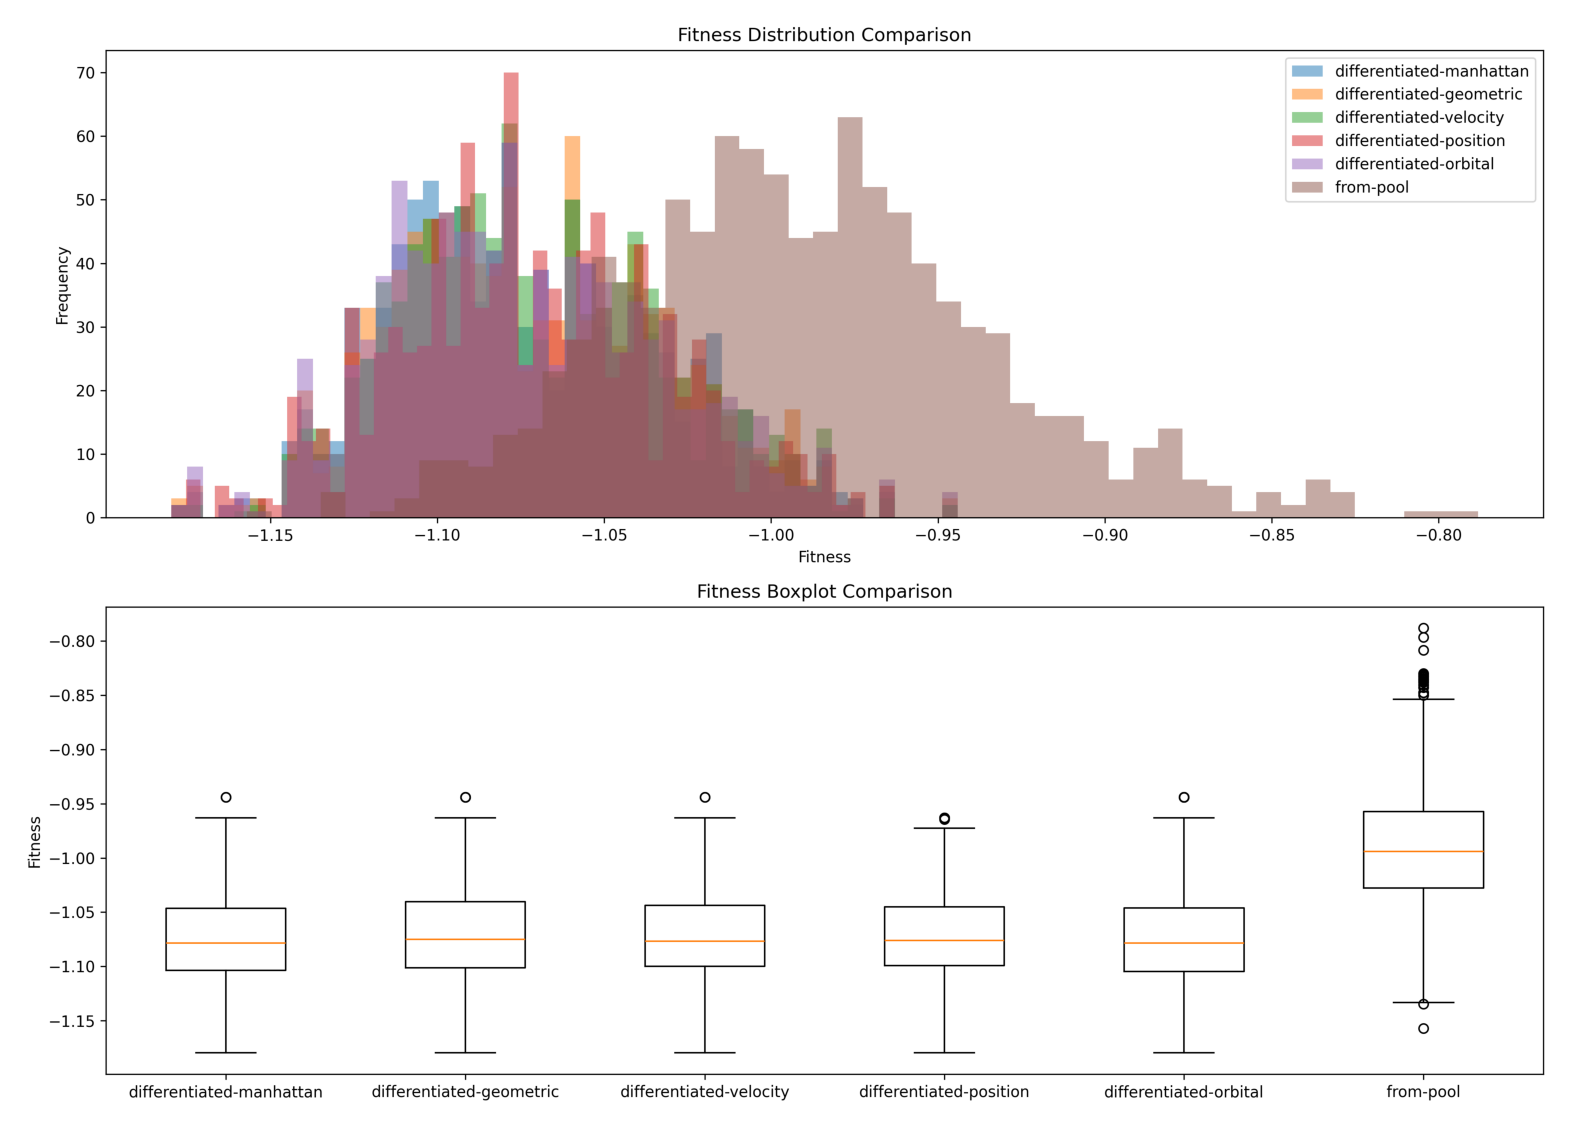

In [11]:
experiment_distance_metric_comparison_plot(udp, ORBIT_NAME)

---

### Results
We will print detailed statistical results for each metric, including mean, standard deviation, min, max, and quartiles.

In [12]:
experiment_distance_metric_comparison_stats(udp, ORBIT_NAME)


Fitness Statistics:
+--------------------------+----------+------------+---------------+------------+----------+----------+-----------+
| Metric Name              |      Min |   Q1 (25%) |   Median (Q2) |   Q3 (75%) |      Max |     Mean |   Std Dev |
+==========================+==========+============+===============+============+==========+==========+===========+
| differentiated-manhattan | -1.17965 |   -1.10351 |      -1.07852 |   -1.0464  | -0.94408 | -1.07445 |   0.03996 |
+--------------------------+----------+------------+---------------+------------+----------+----------+-----------+
| differentiated-geometric | -1.17965 |   -1.10113 |      -1.07496 |   -1.04045 | -0.94408 | -1.07133 |   0.04105 |
+--------------------------+----------+------------+---------------+------------+----------+----------+-----------+
| differentiated-velocity  | -1.17965 |   -1.09994 |      -1.07674 |   -1.04372 | -0.94408 | -1.07124 |   0.03932 |
+--------------------------+----------+------------

---

### Observations:
* Across all distance metrics used in the "differentiated" method, the results show extremely similar fitness statistics.
* The minimum fitness values for all differentiated methods are identical at -1.17965, with slight variations in the first quartile (Q1), median, and third quartile (Q3) values.
* The differences between the mean fitness values for the different metrics are negligible, all hovering around -1.071 to -1.074. The standard deviations across the different metrics also show little variance, indicating consistent performance across different distance metrics.
* In contrast, the "from-pool" method (without differentiation) performed worse overall, with a significantly higher mean (-0.95542) and greater variation in fitness values, as seen from a larger standard deviation (0.05799).
* The boxplots for the differentiated methods overlap heavily, reflecting the near-identical performance.

<br>

---

### Conclusion:
Given the near-identical performance of the various distance metrics, we can conclude that the choice of distance metric does not significantly impact the results when using the "from-pool-differentiated" method for this problem. Therefore, we can move forward using the `manhattan` metric as a default for future experiments, simplifying the pipeline without sacrificing performance. This will allow us to focus on other aspects of optimization rather than fine-tuning distance metrics. The `from-pool` method, while significantly faster, continues to under perform compared to all differentiated methods, and thus we will deprioritize its use for future configurations.

<br>

---

## ***Experiment: Satellite Component Distribution vs Fitness***

### Purpose
This experiment aims to investigate the relationship between the individual components of satellite configurations (x, y, z, xv, yv, zv) and their corresponding fitness. By plotting each of these satellite components against fitness, we aim to identify any patterns or trends that might inform a more effective way of generating initial satellite configurations for optimization.

---

### Generating Results
We will:
1. Generate a large number of satellite configurations using the `from-pool` method.
2. Decompose each configuration into individual satellites and extract their components (`x, y, z, xv, yv, zv`).
3. Calculate the fitness of each configuration.
4. Collect the values for each component along with the corresponding fitness.

In [13]:
experiment_satellite_component_vs_fitness_generate(udp, ORBIT_NAME)

Results already generated. Loading results from results/large-halo/satellite_component_vs_fitness/results.


---

### Plotting
We will plot each satellite component (`x, y, z, xv, yv, zv`) against their corresponding fitness values to check for any patterns or correlations.

Plot already generated. Loading from results/large-halo/satellite_component_vs_fitness/plot_1.png.


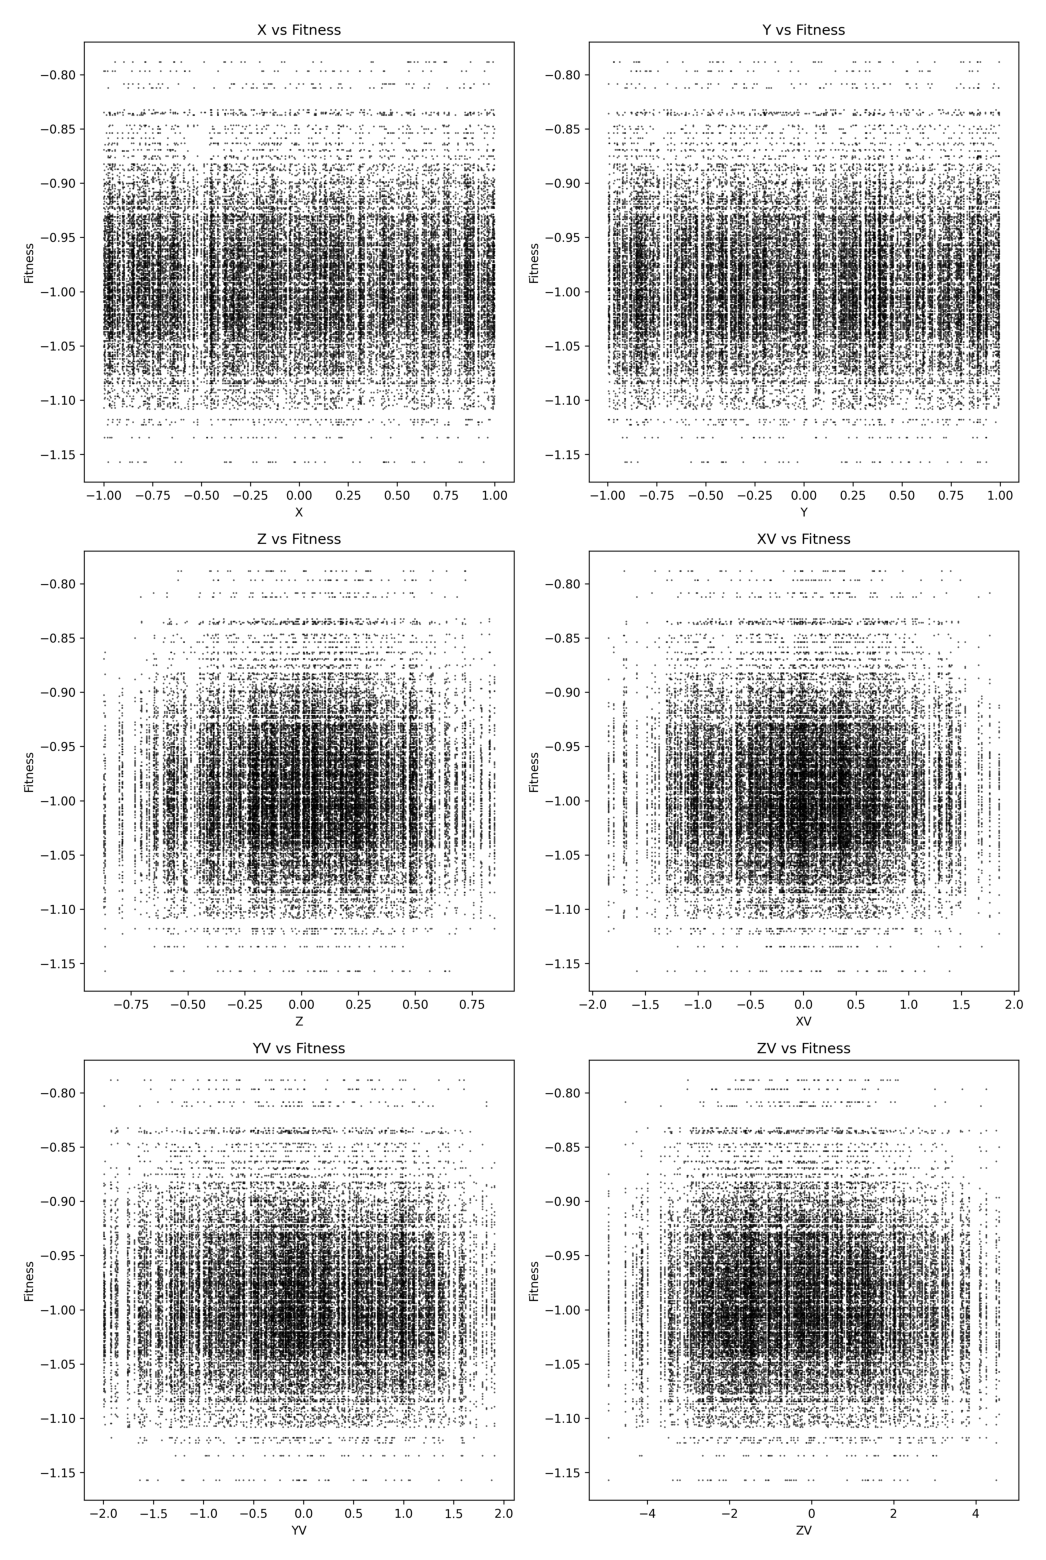

In [14]:
experiment_satellite_component_vs_fitness_plot(udp, ORBIT_NAME)

---

### Results
We will show the min, max, mean, and standard deviation for each satellite component to explore their ranges and potential correlation with fitness.

In [15]:
experiment_satellite_component_vs_fitness_stats(udp, ORBIT_NAME)


Satellite Component Statistics:
+-------------+----------+---------+----------+-----------+
| Component   |      Min |     Max |     Mean |   Std Dev |
+=============+==========+=========+==========+===========+
| X           | -0.99979 | 0.9986  | -0.02283 |   0.58132 |
+-------------+----------+---------+----------+-----------+
| Y           | -0.99529 | 0.99491 |  0.00695 |   0.56613 |
+-------------+----------+---------+----------+-----------+
| Z           | -0.87006 | 0.8487  |  0.02624 |   0.3433  |
+-------------+----------+---------+----------+-----------+
| XV          | -1.84891 | 1.85855 |  0.03187 |   0.7081  |
+-------------+----------+---------+----------+-----------+
| YV          | -1.99557 | 1.90749 | -0.018   |   0.88144 |
+-------------+----------+---------+----------+-----------+
| ZV          | -4.94508 | 4.56837 | -0.19441 |   1.90297 |
+-------------+----------+---------+----------+-----------+
Statistics saved to results/large-halo/satellite_component_vs_fitne

---

### Observations
Based on the statistics generated for the individual satellite parameters (X, Y, Z, XV, YV, ZV) and their respective fitness values, we observed the following:
* X, Y, and Z Parameters: The distributions of satellite positions (X, Y, Z) appear fairly even within the bounds of [-1.0, 1.0]. X and Y are very symmetrically distributed around zero, with Y showing no meaningful bias. Z appears to have a slightly tighter spread compared to X and Y.
* Velocity Components (XV, YV, ZV): The velocity components show more variance, particularly ZV, which spans from approximately -5.0 to 5.0, displaying a much wider range than XV and YV. These components appear centered around zero but with greater variance, especially in ZV.
* Concentration Around Center: Parameters such as Z, XV, YV, and ZV are more tightly centered around the middle of their ranges, while X and Y are more evenly distributed. This suggests that shrinking the bounds for certain parameters could improve satellite generation efficiency, as useful ("alive") satellites seem to cluster in particular regions.

<br>

---

### Conclusion
Based on the results, shrinking the bounds for satellite generation could lead to a significant increase in speed and more efficient initialization of the satellite pool, especially for parameters like Z, XV, YV, and ZV, where most of the useful (alive) satellites are concentrated near the center of the range.
By reducing the search space in the UDP’s bounds:
* Speed Improvement: Initial testing showed a 50x speedup in generating alive satellites when tighter bounds were used, reducing the time from 6 minutes to 4 seconds for generating 500 satellites.
* Convergence Speed: While not formally tested yet, the reduced bounds could also improve convergence speed by focusing the search on regions where satellites are more likely to survive.

Next steps will involve testing the effects of these tighter bounds during evolution and further evaluating their impact on overall solution quality and convergence speed. If successful, this approach could be a key factor in speeding up the optimization process without sacrificing result quality.

<br>

---

---

## ***Experiment: Testing Speed and Effectiveness of Tight vs. Full Bounds***

### Purpose
This experiment compares the speed and effectiveness of satellite generation using dynamically calculated tight bounds versus the full default bounds. The goal is to reduce the time needed to generate alive satellites without compromising their fitness.

---

### Generating Results: Alive Satellite Generation Speed Test
We will measure the time taken to generate 500 alive satellites using both default full bounds and tighter custom bounds based on satellite component statistics.

In [16]:
experiment_tight_vs_full_bounds_generate(udp, tight_udp, ORBIT_NAME)

Results already generated. Loading results from results/large-halo/tight_vs_full_bounds/results.


---

### Plotting
The following plots compare the tight bounds and full bounds data for satellite components in 2D planes (`xy`, `xz`, `yz`, `xyv``,` `xzv`, `yzv`). The first set of plots shows them side by side for visual comparison, while the second set overlays them on a single graph to highlight any differences.

---

**First Plot: Side-by-Side Comparison of Tight vs. Full Bounds**

The side-by-side plots show the distribution of satellite components in each plane, separately for tight bounds (green) and full bounds (blue). This helps us visually assess whether the tighter bounds capture the same regions of the configuration space as the full bounds.

***Second Plot: Overlay of Tight and Full Bounds on the Same Plot***

In these plots, both tight (green) and full bounds (blue) data are plotted together on the same axes for each plane. This helps highlight areas of overlap or differences between the two datasets. By observing any areas where tight bounds fail to capture data points from the full bounds, we can assess whether the tight bounds provide adequate coverage.

Plot already generated. Loading from results/large-halo/tight_vs_full_bounds/plot_4_1.png.


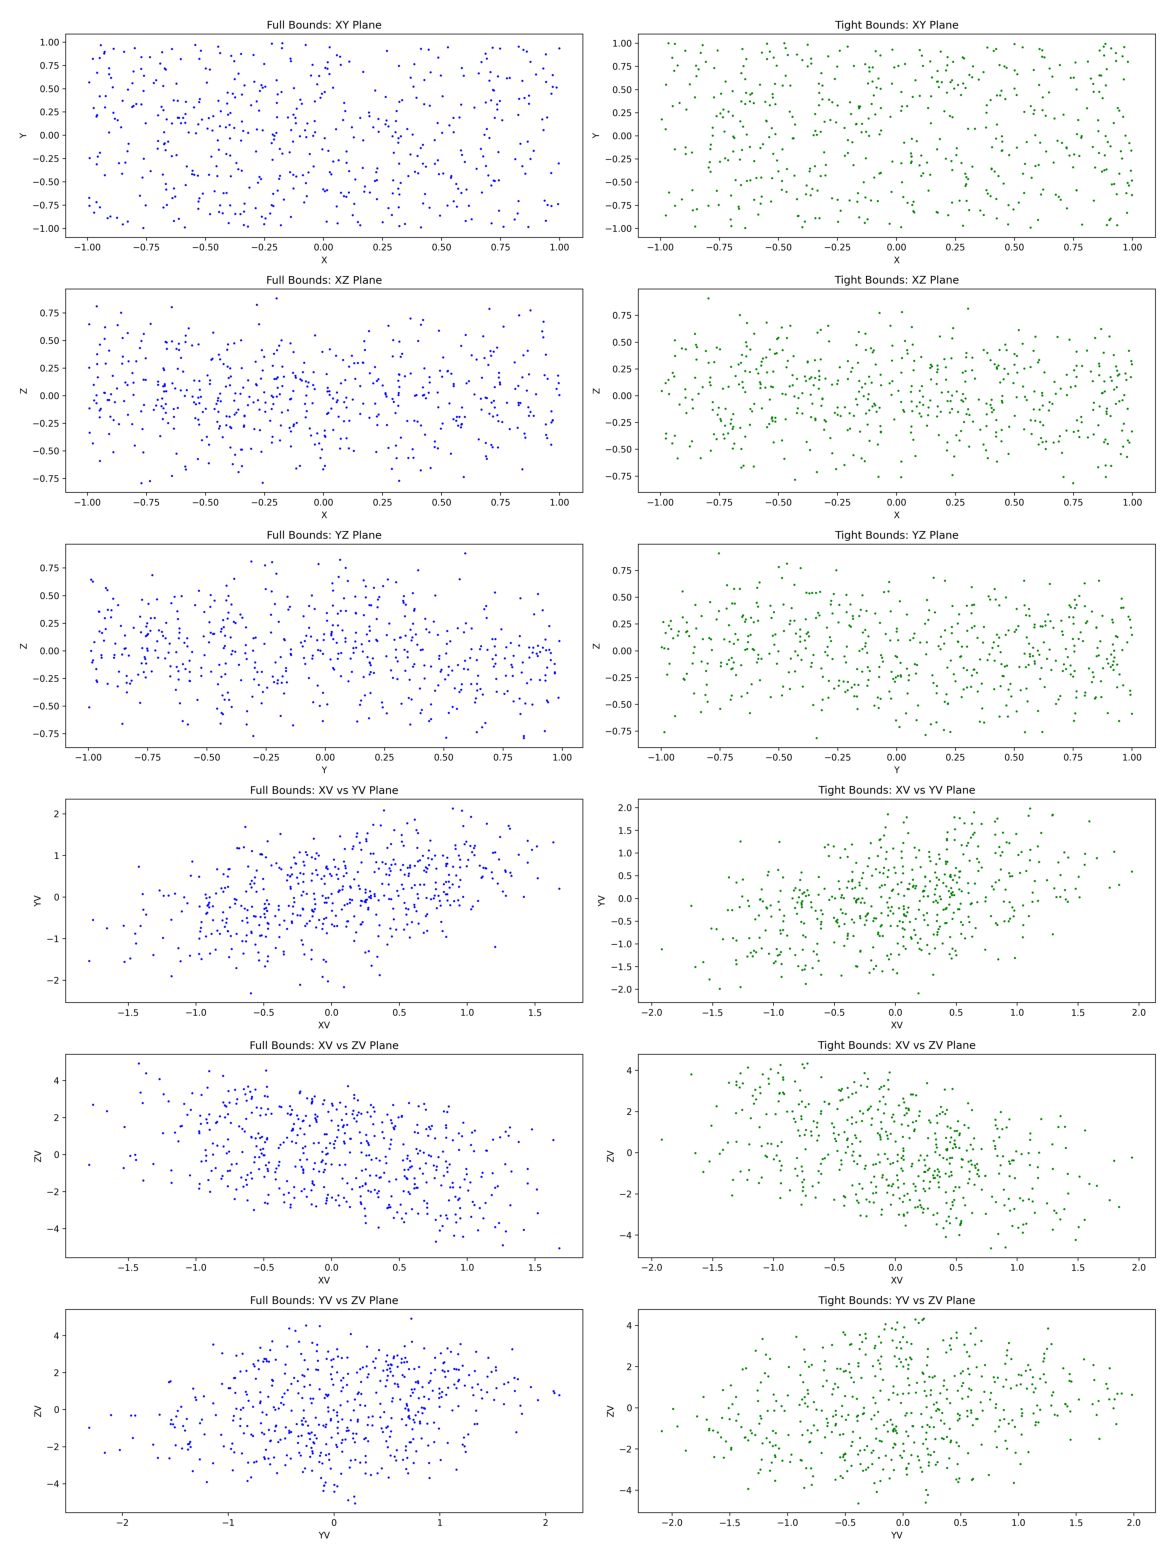

Plot already generated. Loading from results/large-halo/tight_vs_full_bounds/plot_4_2.png.


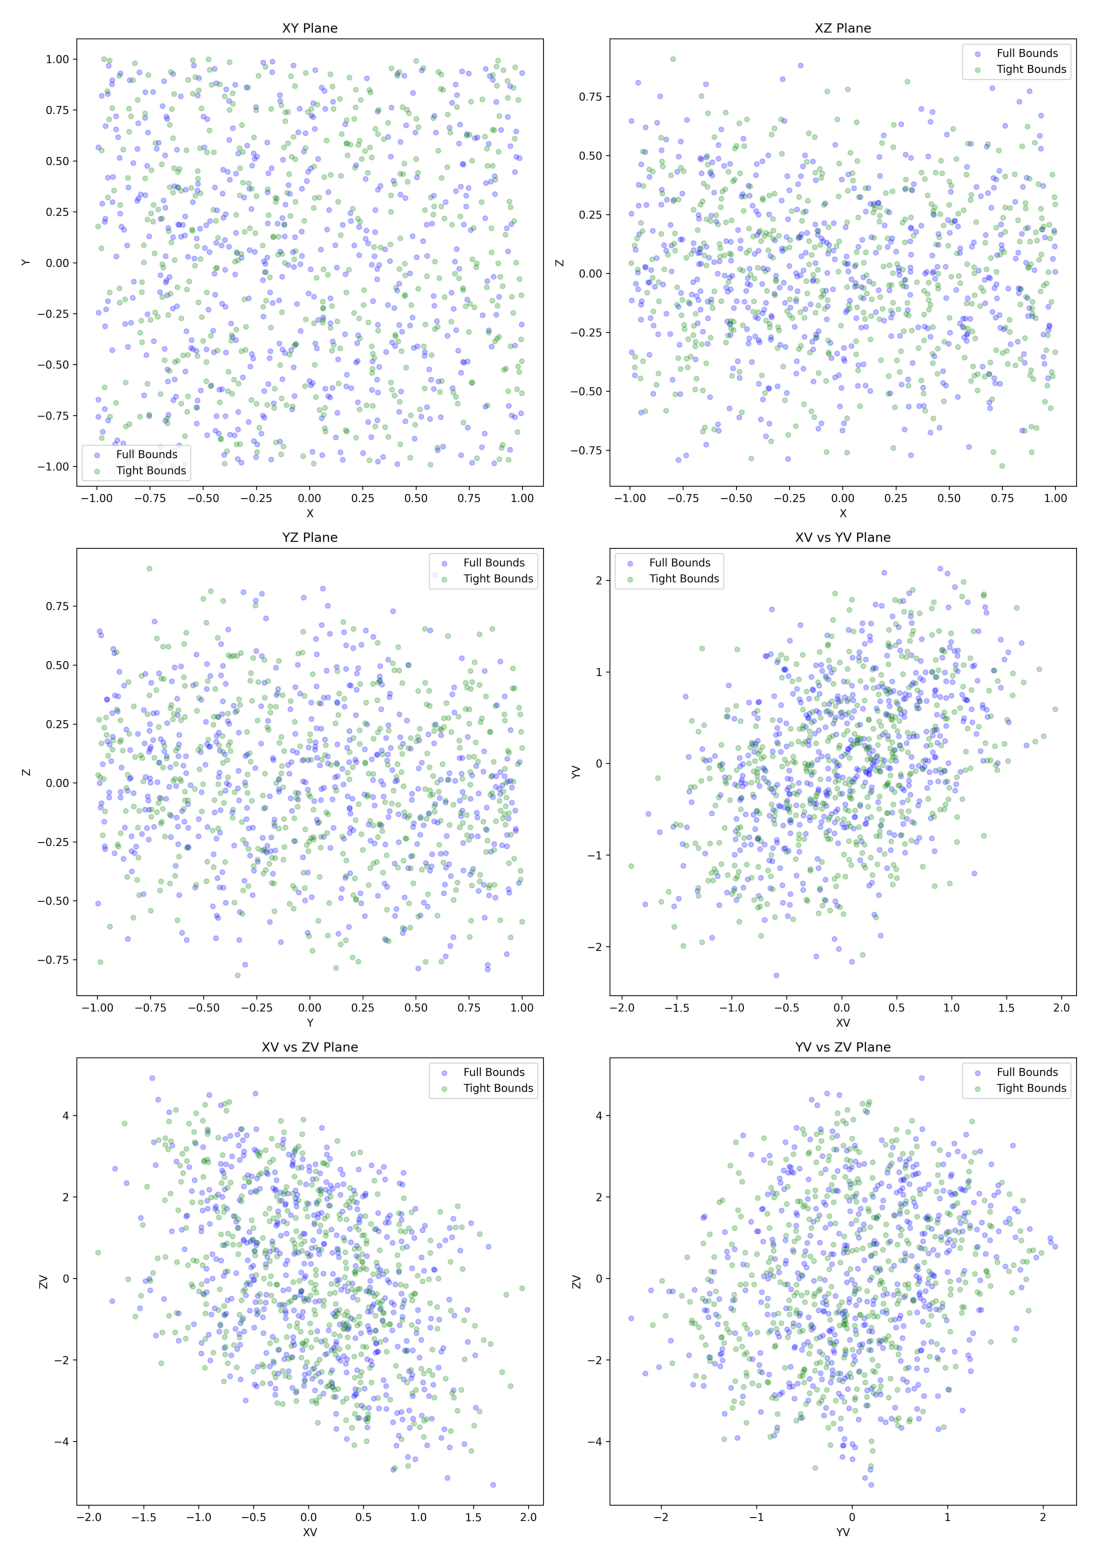

In [17]:
experiment_tight_vs_full_bounds_plot(udp, ORBIT_NAME)
experiment_tight_vs_full_bounds_plot_2(udp, ORBIT_NAME)

In [18]:
experiment_tight_vs_full_bounds_stats(udp, ORBIT_NAME)


Statistical Comparison Between Pools:
+---------+-----------+--------------+----------+---------------+------------------+--------------+---------------+------------------+--------------+
| Value   |   KS Stat |   KS P-value | KS Sig   |   T-test Stat |   T-test P-value | T-test Sig   |   Levene Stat |   Levene P-value | Levene Sig   |
+=========+===========+==============+==========+===============+==================+==============+===============+==================+==============+
| X       |     0.076 |       0.1114 | No       |       -2.1526 |           0.0316 | Yes          |        0.4971 |           0.4809 | No           |
+---------+-----------+--------------+----------+---------------+------------------+--------------+---------------+------------------+--------------+
| Y       |     0.068 |       0.198  | No       |       -1.6818 |           0.0929 | No           |        0.6476 |           0.4212 | No           |
+---------+-----------+--------------+----------+------------

---

### Observations
* **Visual Similarity**: The graphs for both full and tight bounds appear nearly identical, indicating that the distributions of satellite components are very similar across the two datasets.
* **Statistical Tests**:
   * For most components, the Kolmogorov-Smirnov, T-test, and Levene’s test showed **no significant differences**, confirming the visual observation that the distributions are similar.
   * Only two components, X (Kolmogorov-Smirnov) and XV (Levene’s test), exhibited statistically significant differences, but the p-values were close to the significance threshold. This suggests that these differences are likely minor and may not meaningfully impact the overall optimization process.

<br>

---

### Conclusion
Although small statistical differences were detected in the **X** and **XV** components, the overall distributions of satellite configurations in both the full and tight bounds appear to be highly similar. Given the substantial speed improvement achieved by using tight bounds, these small differences are unlikely to justify reverting to full bounds.

To further validate the impact of tight bounds, we will proceed to the next experiment, where we will compare the fitness of randomly generated chromosomes using both the full and tight bounds. By analyzing the fitness performance, we can determine if the tighter bounds affect the optimization process or the quality of the generated solutions.

<br>

---